Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 700)               549500    
                                                                 
 encoder_leakyrelu_1 (Leaky  (None, 700)               0         
 ReLU)                                                           
                                                                 
 encoder_dense_2 (Dense)     (None, 5)                 3505      
                                                                 
 encoder_output (LeakyReLU)  (None, 5)                 0         
                                                                 
Total params: 553005 (2.11 MB)
Trainable params: 553005 (2.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

Epoch 1/20
235/235 [==============================] - 12s 49ms/step - loss: 0.0438 - val_loss: 0.0359
Epoch 2/20
235/235 [==============================] - 11s 48ms/step - loss: 0.0344 - val_loss: 0.0330
Epoch 3/20
235/235 [==============================] - 16s 67ms/step - loss: 0.0324 - val_loss: 0.0317
Epoch 4/20
235/235 [==============================] - 13s 53ms/step - loss: 0.0313 - val_loss: 0.0308
Epoch 5/20
235/235 [==============================] - 9s 39ms/step - loss: 0.0305 - val_loss: 0.0301
Epoch 6/20
235/235 [==============================] - 11s 46ms/step - loss: 0.0299 - val_loss: 0.0296
Epoch 7/20
235/235 [==============================] - 11s 47ms/step - loss: 0.0295 - val_loss: 0.0292
Epoch 8/20
235/235 [==============================] - 11s 46ms/step - loss: 0.0291 - val_loss: 0.0290
Epoch 9/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0287 - val_loss: 0.0286
Epoch 10/20
235/235 [==============================] - 11s 45ms/step - loss: 0.0285 

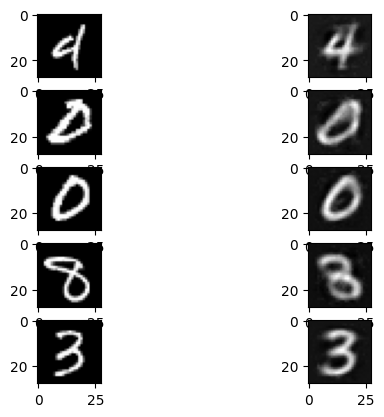

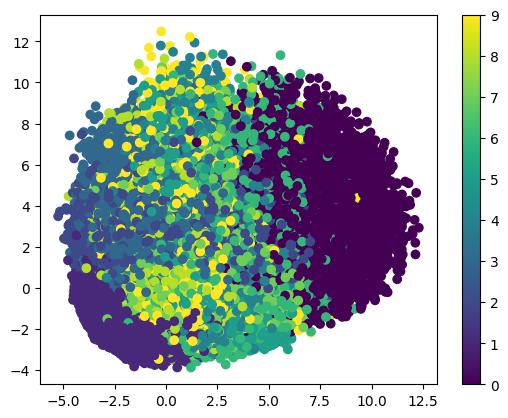

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Encoder
x = Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = Dense(units=700, name="encoder_dense_1")(x)
encoder_activ_layer1 = LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = Dense(units=5, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = Model(x, encoder_output, name="encoder_model")
encoder.summary()

# Decoder
decoder_input = Input(shape=(5), name="decoder_input")

decoder_dense_layer1 = Dense(units=700, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

# Autoencoder
ae_input = Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

# RMSE
def rmse(y_true, y_predict):
    return tf.keras.backend.mean(tf.keras.backend.square(y_true-y_predict))

# AE Compilation
ae.compile(loss="mse", optimizer= Adam(learning_rate=0.0005))

# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = np.reshape(x_train_orig, newshape=(x_train_orig.shape[0], np.prod(x_train_orig.shape[1:])))
x_test = np.reshape(x_test_orig, newshape=(x_test_orig.shape[0], np.prod(x_test_orig.shape[1:])))

# Training AE
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = np.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=x_train.shape[0])
    plt.subplot(num_images_to_show, 2, plot_ind)
    plt.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    plt.subplot(num_images_to_show, 2, plot_ind+1)
    plt.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

plt.figure()
plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
plt.colorbar()